In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [2]:
# archivo = "../../data/fluke_01-07-2021_05-07-2021.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1,encoding='iso-8859-1')
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [3]:
s8lp    = pd.read_csv("../data/s8lp_27-09-2021.csv",index_col=0,parse_dates=True)
scd30   = pd.read_csv('../data/scd30_27-09-2021.csv',index_col=0,parse_dates=True)
sen0220 = pd.read_csv('../data/sen0220_27-09-2021.csv',index_col=0,parse_dates=True) 
fluke = importa_fluke('../data/fluke_29-09-2021_prueba700.csv')

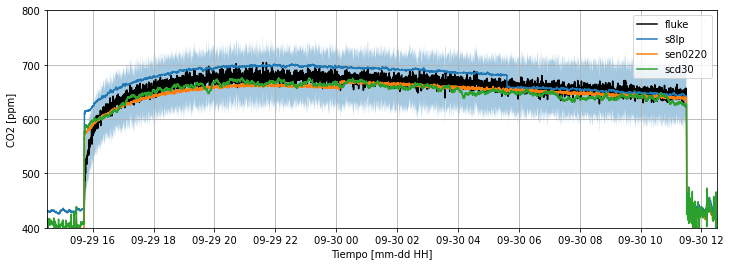

In [9]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2021-09-29 14:30") 
fecha2 = fecha1 + pd.Timedelta("22H")

ax.plot(fluke,label='fluke',c='k')
ax.plot(s8lp,label='s8lp')
ax.plot(sen0220,label='sen0220')
ax.plot(scd30,label='scd30')

ax.fill_between(fluke.index,fluke.fluke+50,fluke.fluke-50,alpha=0.4)

ax.set_ylim(400,800)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Tiempo [mm-dd HH]")
ax.set_yticks(np.arange(400,810,100))
# ax.set_title("Mediciones CO2")
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

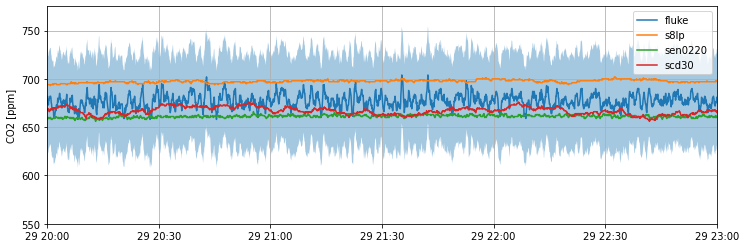

In [5]:
fig, ax = plt.subplots(figsize=(12,4))


fecha1 = parse("2021-09-29 14:30")  + pd.Timedelta('5.5H')
fecha2 = fecha1 + pd.Timedelta("3H")

ax.plot(fluke,label='fluke')
ax.plot(s8lp,label='s8lp')
ax.plot(sen0220,label='sen0220')
ax.plot(scd30,label='scd30')

ax.fill_between(fluke.index,fluke.fluke+50,fluke.fluke-50,alpha=0.4)


ax.set_ylim(575,775)
ax.set_ylabel("CO2 [ppm]")
ax.set_yticks(np.linspace(550,750,5))
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()

In [6]:
fluke_min    =   fluke.resample('20S').bfill()
s8lp_min     =    s8lp.resample('20S').bfill()
sen0220_min  = sen0220.resample('20S').bfill()
scd30_min    =   scd30.resample('20S').bfill()
datos = pd.concat([fluke_min,s8lp_min,sen0220_min,scd30_min],axis=1)


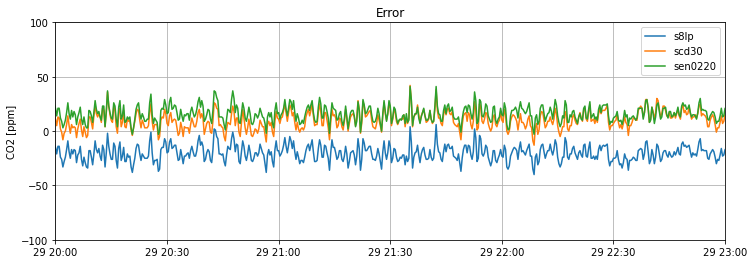

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

sensores = ['s8lp','scd30','sen0220']
for sensor in sensores:
    ax.plot(datos['fluke']-datos[sensor],label=sensor)


    
ax.set_yticks(np.linspace(-100,100,5))
ax.set_ylim(-100,100)
ax.set_ylabel("CO2 [ppm]")
ax.set_title("Error")
ax.legend()
ax.set_xlim(fecha1,fecha2)
ax.grid()
calibracion = datos[fecha1:fecha2]

In [8]:
calibracion.to_csv('../data/calibracion_650ppm.csv')